# Image Classification with DNN

## DATASETS:
(a) Carbonic Anhydrase II (ChEMBL205), a protein lyase,  
(b) Cyclin-dependent kinase 2 (CHEMBL301), a protein kinase,  
(c) ether-a-go-go-related gene potassium channel 1 (HERG) (CHEMBL240), a voltage-gated ion channel,  
(d) Dopamine D4 receptor (CHEMBL219), a monoamine GPCR,  
(e) Coagulation factor X (CHEMBL244), a serine protease,  
(f) Cannabinoid CB1 receptor (CHEMBL218), a lipid-like GPCR and  
(g) Cytochrome P450 19A1 (CHEMBL1978), a cytochrome P450.  
The activity classes were selected based on data availability and as representatives of therapeutically important target classes or as anti-targets.

In [9]:
!nvidia-smi

Thu Apr 22 20:06:12 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 450.36.06    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro P5000        On   | 00000000:00:05.0 Off |                  Off |
| 26%   24C    P8     7W / 180W |      1MiB / 16278MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [10]:
%%capture
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

In [11]:
# Import
import pandas as pd
import numpy as np
from pathlib import Path

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')
from rdkit import Chem
from rdkit.Chem import AllChem

In [155]:
dataset = 'CHEMBL205_cl'

In [156]:
path = Path('../dataset/13321_2017_226_MOESM1_ESM/')
df = pd.read_csv(path/f'{dataset}.csv')

In [ ]:
list(path.iterdir())

# Generate images

In [157]:
DATA = path/'mol_images'
DATA.mkdir(exist_ok=True)

In [158]:
df.head()

,CID,SMILES,Activity
0,CHEMBL188002,S(=O)(=O)(N)c1cc(N/C(/S)=N\c2cc(C(=O)[O-])c(cc2)C=2c3c(OC4=CC(=O)C=CC=24)cc(O)cc3)ccc1,1
1,CHEMBL364127,Clc1ccc(cc1)C(=O)NC1Cc2cc(S(=O)(=O)N)ccc2C1,1
2,CHEMBL1683469,S(=O)(=O)(N)c1ccc(cc1)CNS(=O)(=O)CC12CCC(CC1=O)C2(C)C,1
3,CHEMBL52564,Oc1ccccc1\C=C\C(=O)[O-],1
4,CHEMBL21427,OB(O)c1ccc(OC)cc1,1


In [65]:
#DElETE DIRECTORY
#import shutil
#import pathlib
#import os  # for checking results

#print(os.listdir())
# ["a_directory", "foo.py", ...]

#DATA = DATA/'directory'

#shutil.rmtree(DATA)
#print(os.listdir())
# ["foo.py", ...]

In [186]:
# Iterate all rows in the dataframe and create images

IMAGES = DATA/dataset
#if not IMAGES.is_dir():
    #IMAGES.mkdir(exist_ok=True)
for i, r in df.iterrows():
    
        cid = r.CID
        smile = r.SMILES
        mol = Chem.MolFromSmiles(smile)
        Chem.Draw.MolToFile(mol, IMAGES/f'{cid}.png', size = (300, 300), imageType='png')

In [187]:
images = list(IMAGES.glob('*.png'))

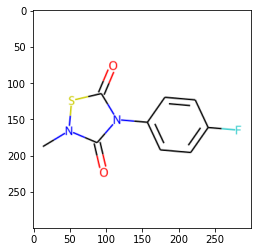

In [188]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(images[0])
imgplot = plt.imshow(img)
plt.show()

# Create train validation split

In [74]:
from sklearn.model_selection import train_test_split

In [189]:
x_train, x_valid = train_test_split(df.index, test_size=0.2, random_state=666, stratify=df['Activity'])
df.loc[x_train, 'is_valid']=False
df.loc[x_valid, 'is_valid']=True

In [190]:
df.is_valid.value_counts()

False    14352
True      3589
Name: is_valid, dtype: int64

# Create dataloader

In [77]:
from fastai.vision.all import *

In [164]:
df['Image'] = df['CID'] + '.png'
df.head()

,CID,SMILES,Activity,is_valid,Image
0,CHEMBL188002,S(=O)(=O)(N)c1cc(N/C(/S)=N\c2cc(C(=O)[O-])c(cc2)C=2c3c(OC4=CC(=O)C=CC=24)cc(O)cc3)ccc1,1,False,CHEMBL188002.png
1,CHEMBL364127,Clc1ccc(cc1)C(=O)NC1Cc2cc(S(=O)(=O)N)ccc2C1,1,False,CHEMBL364127.png
2,CHEMBL1683469,S(=O)(=O)(N)c1ccc(cc1)CNS(=O)(=O)CC12CCC(CC1=O)C2(C)C,1,False,CHEMBL1683469.png
3,CHEMBL52564,Oc1ccccc1\C=C\C(=O)[O-],1,False,CHEMBL52564.png
4,CHEMBL21427,OB(O)c1ccc(OC)cc1,1,False,CHEMBL21427.png


In [79]:
images = df['CID'] + ".png"
images.head()

0     CHEMBL494207.png
1    CHEMBL2180226.png
2    CHEMBL2180223.png
3    CHEMBL2180222.png
4    CHEMBL2180221.png
Name: CID, dtype: object

In [191]:
db = DataBlock(
    blocks = (ImageBlock(), CategoryBlock()), 
    get_x=ColReader('Image', pref=IMAGES),
    get_y=ColReader('Activity'), 
    splitter=ColSplitter('is_valid'),
    item_tfms=None, 
    batch_tfms=None
    )

In [192]:
dls = db.dataloaders(df, bs=64, shuffle_train=True)

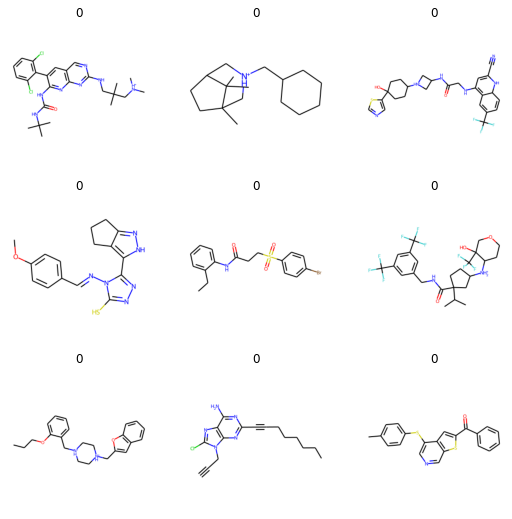

In [193]:
dls.show_batch()

# Train CNN model

In [85]:
from sklearn.metrics import auc,roc_auc_score,recall_score,precision_score,f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score

In [168]:
def train_model(dls, arch=resnet18, epochs=6, freeze_epochs=4, wd=None):
    
    print(f'Training model on dataset: {dataset}')
    print(f'Architechture: {arch}')
    print(f'Untrained epochs: freeze_epochs={freeze_epochs}')
    print(f'Trained epochs: epochs={epochs}')
    
    learn = cnn_learner(dls, arch=resnet18, pretrained=True, 
                            wd=wd,
                            metrics=[accuracy, 
                            F1Score(), 
                            Precision(), 
                            Recall(), 
                            RocAucBinary(), 
                            MatthewsCorrCoef()])
    
    
    print(f'Finding learning rate...')
    lr_min, lr_steep = learn.lr_find(suggestions=True, show_plot=False)
    print(f'Training model with learning rate: {lr_min}')
    learn.fine_tune(epochs, lr_min, freeze_epochs=freeze_epochs)
    
    return learn

In [108]:
learn.fine_tune(6, lr_min, freeze_epochs=4)

epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,time
0,0.284817,0.181910,0.934289,0.590164,0.685121,0.518325,0.910491,0.561580,00:39
1,0.228853,0.179736,0.941458,0.655415,0.708207,0.609948,0.923876,0.625698,00:39
2,0.191535,0.141762,0.952449,0.737813,0.742706,0.732984,0.960451,0.711686,00:41
3,0.140691,0.125002,0.962724,0.779037,0.848765,0.719895,0.968268,0.761901,00:40


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,time
0,0.125064,0.139063,0.957228,0.728376,0.866426,0.628272,0.963510,0.716552,00:52
1,0.112283,0.115448,0.959618,0.745098,0.879004,0.646597,0.971483,0.733793,00:52
2,0.072706,0.100674,0.975149,0.849711,0.948387,0.769634,0.973456,0.841747,00:52
3,0.037130,0.092876,0.973477,0.859671,0.831296,0.890052,0.979884,0.845645,00:52
4,0.010522,0.082950,0.983751,0.908602,0.933702,0.884817,0.985189,0.900084,00:52
5,0.004011,0.084918,0.984946,0.914286,0.951841,0.879581,0.985771,0.906897,00:52


In [ ]:
learn = train_model(dls)

Training model on dataset: CHEMBL205_cl
Architechture: <function resnet18 at 0x7fa013415d30>
Untrained epochs: freeze_epochs=4
Trained epochs: epochs=6
Finding learning rate...


Training model with learning rate: 0.010000000149011612


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,time
0,0.329255,0.162569,0.936751,0.634461,0.667797,0.604294,0.935894,0.600833,01:08
1,0.190733,0.142372,0.948175,0.658088,0.821101,0.549080,0.949441,0.646230,01:07
2,0.191524,0.149163,0.954862,0.722603,0.817829,0.647239,0.956288,0.704062,01:07
3,0.148587,0.167602,0.956255,0.744715,0.792388,0.702454,0.960057,0.722453,01:08


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,time
0,0.131395,0.122411,0.955141,0.720000,0.831325,0.634969,0.964807,0.703563,01:26
1,0.133426,0.133145,0.956813,0.751204,0.787879,0.717791,0.963472,0.728561,01:26
2,0.106324,0.126337,0.958484,0.753719,0.817204,0.699387,0.969412,0.733842,01:25


In [ ]:
learn = train_model(dls, arch=resnet34)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(k=5)

# Hook the activations from the second last layer

In [ ]:
layers = flatten_model(learn.model)
len(layers)

In [ ]:
layers